In [1]:
import os
os.chdir("/gpfs/home/asun/jin_lab/GEARS/demo/")
print(os.getcwd())
import sys
sys.path.append(os.path.abspath('..'))

from gears import PertData, GEARS

/gpfs/group/jin/asun/GEARS/demo


/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: Futur

Load data. We use norman as an example.

In [2]:
pert_data = PertData('./data')
pert_data.load(data_name = 'norman')
pert_data.prepare_split(split = 'simulation', seed = 1)
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128)

Found local copy...


Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:43
combo_seen2:19
unseen_single:36
Done!
Creating dataloaders....
Done!


here1


Create a model object; if you use [wandb](https://wandb.ai), you can easily track model training and evaluation by setting `weight_bias_track` to true, and specify the `proj_name` and `exp_name` that you like.

In [3]:
gears_model = GEARS(pert_data, device = 'cuda:0', 
                        weight_bias_track = True, 
                        proj_name = 'pertnet', 
                        exp_name = 'pertnet')
gears_model.model_initialize(hidden_size = 64)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


AttributeError: 'Series' object has no attribute 'nonzero'

You can find available tunable parameters in model_initialize via

In [7]:
gears_model.tunable_parameters()

{'hidden_size': 'hidden dimension, default 64',
 'num_go_gnn_layers': 'number of GNN layers for GO graph, default 1',
 'num_gene_gnn_layers': 'number of GNN layers for co-expression gene graph, default 1',
 'decoder_hidden_size': 'hidden dimension for gene-specific decoder, default 16',
 'num_similar_genes_go_graph': 'number of maximum similar K genes in the GO graph, default 20',
 'num_similar_genes_co_express_graph': 'number of maximum similar K genes in the co expression graph, default 20',
 'coexpress_threshold': 'pearson correlation threshold when constructing coexpression graph, default 0.4',
 'uncertainty': 'whether or not to turn on uncertainty mode, default False',
 'uncertainty_reg': 'regularization term to balance uncertainty loss and prediction loss, default 1',
 'direction_lambda': 'regularization term to balance direction loss and prediction loss, default 1'}

Train your model:

Note: For the sake of demo, we set epoch size to 1. To get full model, set `epochs = 20`.

In [22]:
gears_model.train(epochs = 1, lr = 1e-3)

Start Training...


Epoch 1 Step 1 Train Loss: 0.5626
Epoch 1 Step 51 Train Loss: 0.4361
Epoch 1 Step 101 Train Loss: 0.4368
Epoch 1 Step 151 Train Loss: 0.4140
Epoch 1 Step 201 Train Loss: 0.4180
Epoch 1 Step 251 Train Loss: 0.4792
Epoch 1 Step 301 Train Loss: 0.5223
Epoch 1 Step 351 Train Loss: 0.4383
Epoch 1 Step 401 Train Loss: 0.4672
Epoch 1 Step 451 Train Loss: 0.5511
Epoch 1 Step 501 Train Loss: 0.4343
Epoch 1 Step 551 Train Loss: 0.5042
Epoch 1 Step 601 Train Loss: 0.5136
Epoch 1 Step 651 Train Loss: 0.4401
Epoch 1 Step 701 Train Loss: 0.5244
Epoch 1 Step 751 Train Loss: 0.4747
Epoch 1 Step 801 Train Loss: 0.4465
Epoch 1 Step 851 Train Loss: 0.4545
Epoch 1 Step 901 Train Loss: 0.5126
Epoch 1 Step 951 Train Loss: 0.5011
Epoch 1 Step 1001 Train Loss: 0.4591
Epoch 1 Step 1051 Train Loss: 0.4627
Epoch 1 Step 1101 Train Loss: 0.6890
Epoch 1 Step 1151 Train Loss: 0.4552
Epoch 1 Step 1201 Train Loss: 0.4636
Epoch 1 Step 1251 Train Loss: 0.4276
Epoch 1 Step 1301 Train Loss: 0.4147
Epoch 1 Step 1351 Train 

Save and load pretrained models:

In [23]:
gears_model.save_model('test_model')
gears_model.load_pretrained('test_model')

In [3]:
gears_model = GEARS(pert_data, device = 'cuda:0', 
                        weight_bias_track = True, 
                        proj_name = 'pertnet', 
                        exp_name = 'pertnet')
gears_model.load_pretrained('test_model')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [4]:
pert_data.set2conditions

{'test': ['CBL+PTPN9',
  'DUSP9+ctrl',
  'MAP2K6+SPI1',
  'UBASH3B+PTPN12',
  'BCORL1+ctrl',
  'MEIS1+ctrl',
  'CBL+ctrl',
  'KLF1+FOXA1',
  'TBX3+TBX2',
  'SLC4A1+ctrl',
  'DUSP9+MAPK1',
  'COL2A1+ctrl',
  'CEBPE+KLF1',
  'UBASH3B+OSR2',
  'UBASH3B+ZBTB25',
  'DUSP9+ETS2',
  'ZNF318+FOXL2',
  'UBASH3B+PTPN9',
  'S1PR2+ctrl',
  'CELF2+ctrl',
  'JUN+CEBPA',
  'CDKN1A+ctrl',
  'ctrl+MEIS1',
  'MAPK1+PRTG',
  'MAP2K3+IKZF3',
  'KLF1+COL2A1',
  'PTPN12+OSR2',
  'ETS2+CEBPE',
  'POU3F2+FOXL2',
  'DUSP9+PRTG',
  'CKS1B+ctrl',
  'BCL2L11+TGFBR2',
  'AHR+KLF1',
  'CEBPB+CEBPA',
  'PRTG+ctrl',
  'ETS2+CNN1',
  'C3orf72+ctrl',
  'CNN1+MAPK1',
  'FOXL2+MEIS1',
  'FOXL2+ctrl',
  'FOSB+CEBPE',
  'PTPN12+PTPN9',
  'FOSB+CEBPB',
  'ctrl+CDKN1A',
  'BCL2L11+BAK1',
  'FOXA3+HOXB9',
  'ARID1A+ctrl',
  'ctrl+COL2A1',
  'CEBPE+CNN1',
  'ZC3HAV1+HOXC13',
  'CBL+CNN1',
  'ZBTB10+PTPN12',
  'CBL+UBASH3B',
  'CEBPB+PTPN12',
  'BCL2L11+ctrl',
  'OSR2+ctrl',
  'ctrl+SPI1',
  'CEBPB+MAPK1',
  'ETS2+MAPK1',
  'DU

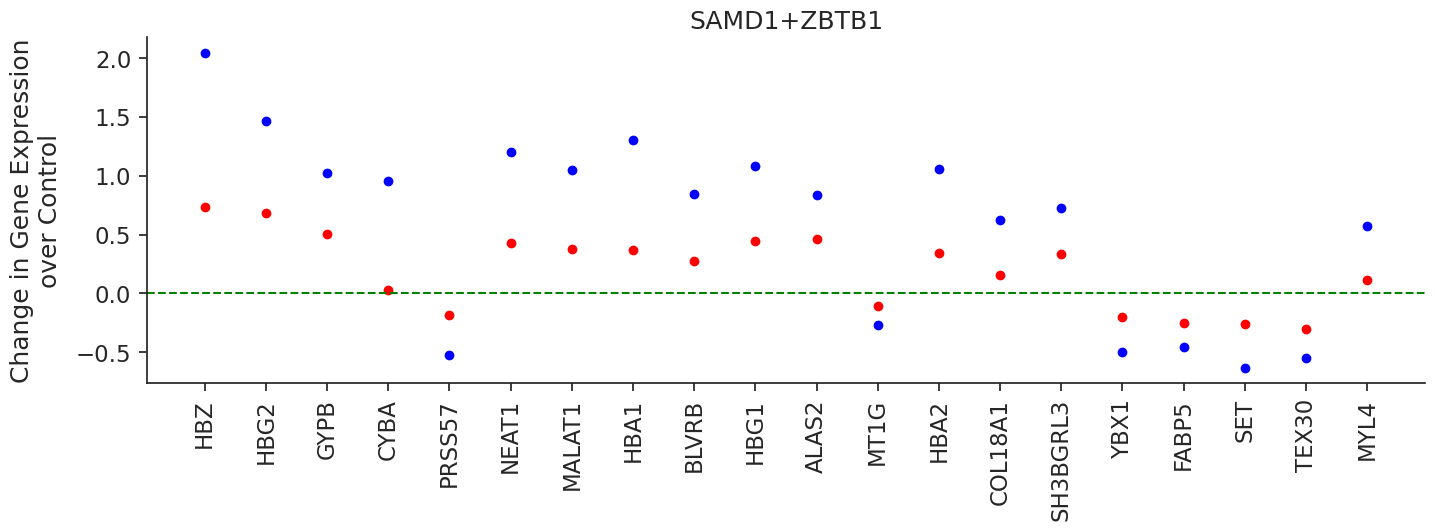

In [ ]:
gears_model.plot_perturbation('SAMD1+ZBTB1')

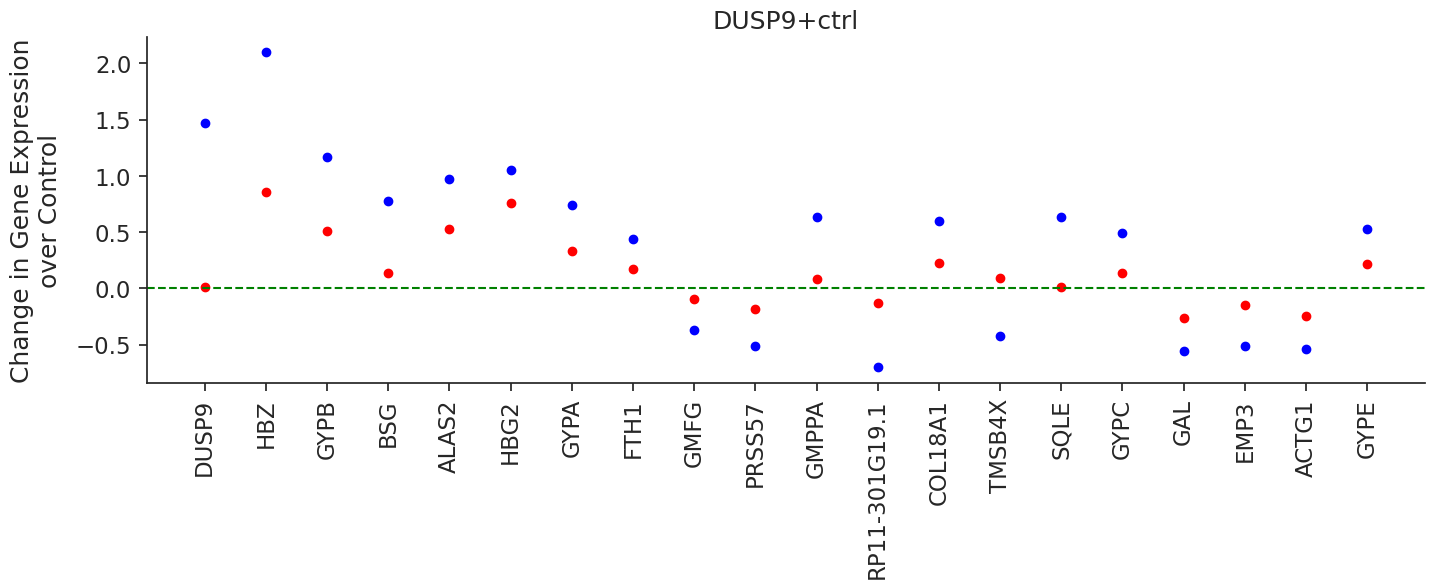

In [8]:
gears_model.plot_perturbation('DUSP9+ctrl')

In [9]:
def plot_perturbation_top_fc(self, query, top_n=20, save_file=None):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

    adata = self.adata
    gene_raw2id = dict(zip(adata.var.index.values, adata.var.gene_name.values))

    # Predicted fold change
    query_ = [q for q in query.split('+') if q != 'ctrl']
    pred_all = self.predict([query_])['_'.join(query_)]
    ctrl_means = adata[adata.obs['condition'] == 'ctrl'].to_df().mean().values
    pred_fc = pred_all - ctrl_means

    # Ground truth fold change (mean across cells)
    truth = adata[adata.obs['condition'] == query].X.toarray()
    mean_truth = truth.mean(axis=0)
    truth_fc = mean_truth - ctrl_means

    # Select top genes by absolute predicted fold change
    top_idx = np.argsort(np.abs(pred_fc))[-top_n:]
    genes = [gene_raw2id[adata.var.index[i]] for i in top_idx]
    pred_fc_top = pred_fc[top_idx]
    truth_fc_top = truth_fc[top_idx]

    # Plot predicted vs ground truth as dots
    plt.figure(figsize=[16.5,4.5])
    plt.title(query)
    for i in range(top_n):
        plt.scatter(i+1, pred_fc_top[i], color='red', label='Predicted' if i==0 else "")
        plt.scatter(i+1, truth_fc_top[i], color='blue', label='Truth' if i==0 else "")

    plt.axhline(0, linestyle="dashed", color='green')
    ax = plt.gca()
    ax.set_xticks(range(1, top_n+1))
    ax.set_xticklabels(genes, rotation=90)
    ax.set_ylabel("Change in Gene Expression\nover Control", labelpad=10)
    sns.despine()

    if save_file:
        plt.savefig(save_file, bbox_inches='tight')
    plt.show()

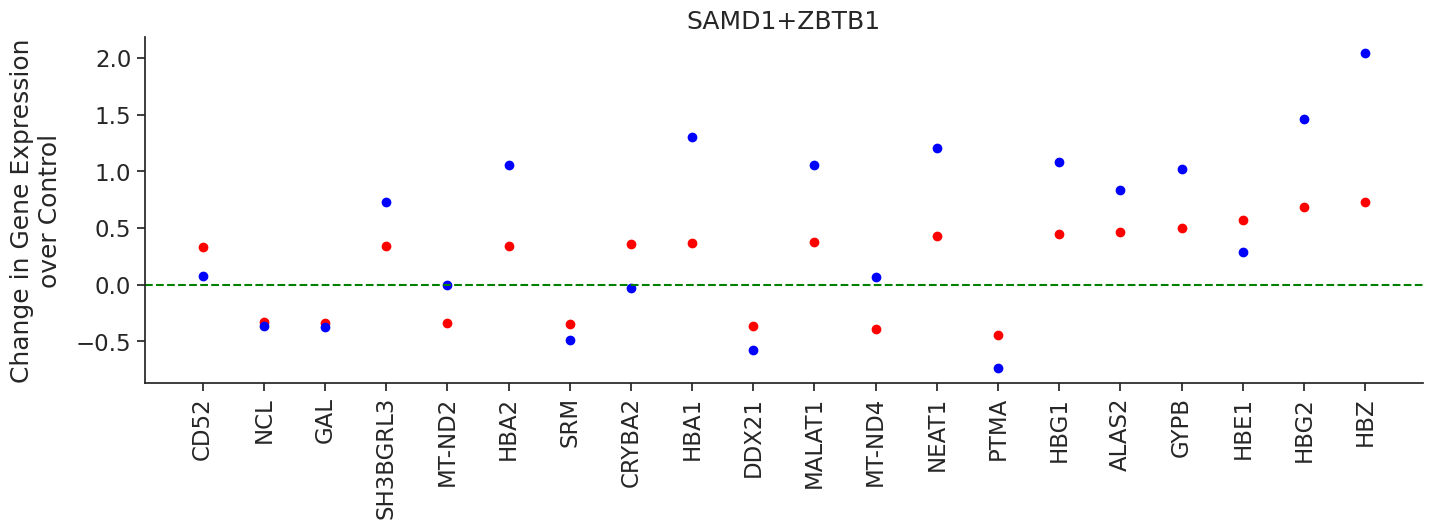

In [13]:
plot_perturbation_top_fc(gears_model, 'SAMD1+ZBTB1')

Make prediction for new perturbation:

In [24]:
gears_model.predict([['FEV'], ['FEV', 'AHR']])

{'FEV': array([-1.6480488e-13,  1.9913395e-03,  2.9681461e-02, ...,
         3.2692113e+00,  4.6557155e-02,  9.8494476e-13], dtype=float32),
 'FEV_AHR': array([-1.8563952e-13,  1.8748159e-02,  1.7998973e-02, ...,
         3.2648251e+00,  7.7018358e-02,  1.2283851e-12], dtype=float32)}

Gene list can be found here:

In [12]:
len(gears_model.gene_list)

5045